In [2]:
# EDA
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from pingouin import ttest

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, log_loss, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Otimização de Hiperparâmetros
import optuna

### Carregar Dados

In [3]:
df_frutas = pd.read_csv('./datasets/fruit_quality.csv')

In [4]:
df_frutas.head(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
5,5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,bad
6,6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,good
7,7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,good
8,8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,bad
9,9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,bad


In [5]:
df_frutas.tail(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3990,3990,-1.396794,-0.599596,-1.931104,1.815668,1.670732,1.614027,-0.987968,bad
3991,3991,-4.007762,2.970164,0.218167,-0.492369,1.656375,-2.133895,-4.431321,good
3992,3992,1.764253,-2.079695,-0.083383,-0.086724,-1.703385,3.840101,-0.338261,good
3993,3993,1.520142,-0.352623,-3.206467,1.341719,0.675568,0.107093,-0.945080,bad
3994,3994,1.482508,-2.581181,-0.306888,1.527877,1.056361,2.560829,-1.229255,good
3995,3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good
3999,3999,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796,good


In [6]:
df_frutas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [7]:
df_frutas.drop(columns=['A_id'], axis=1, inplace=True)

### EDA

In [8]:
px.bar(df_frutas.value_counts('Quality') / len(df_frutas) * 100)

In [9]:
df_frutas['Quality'] = (df_frutas['Quality'] == 'good').astype(int)

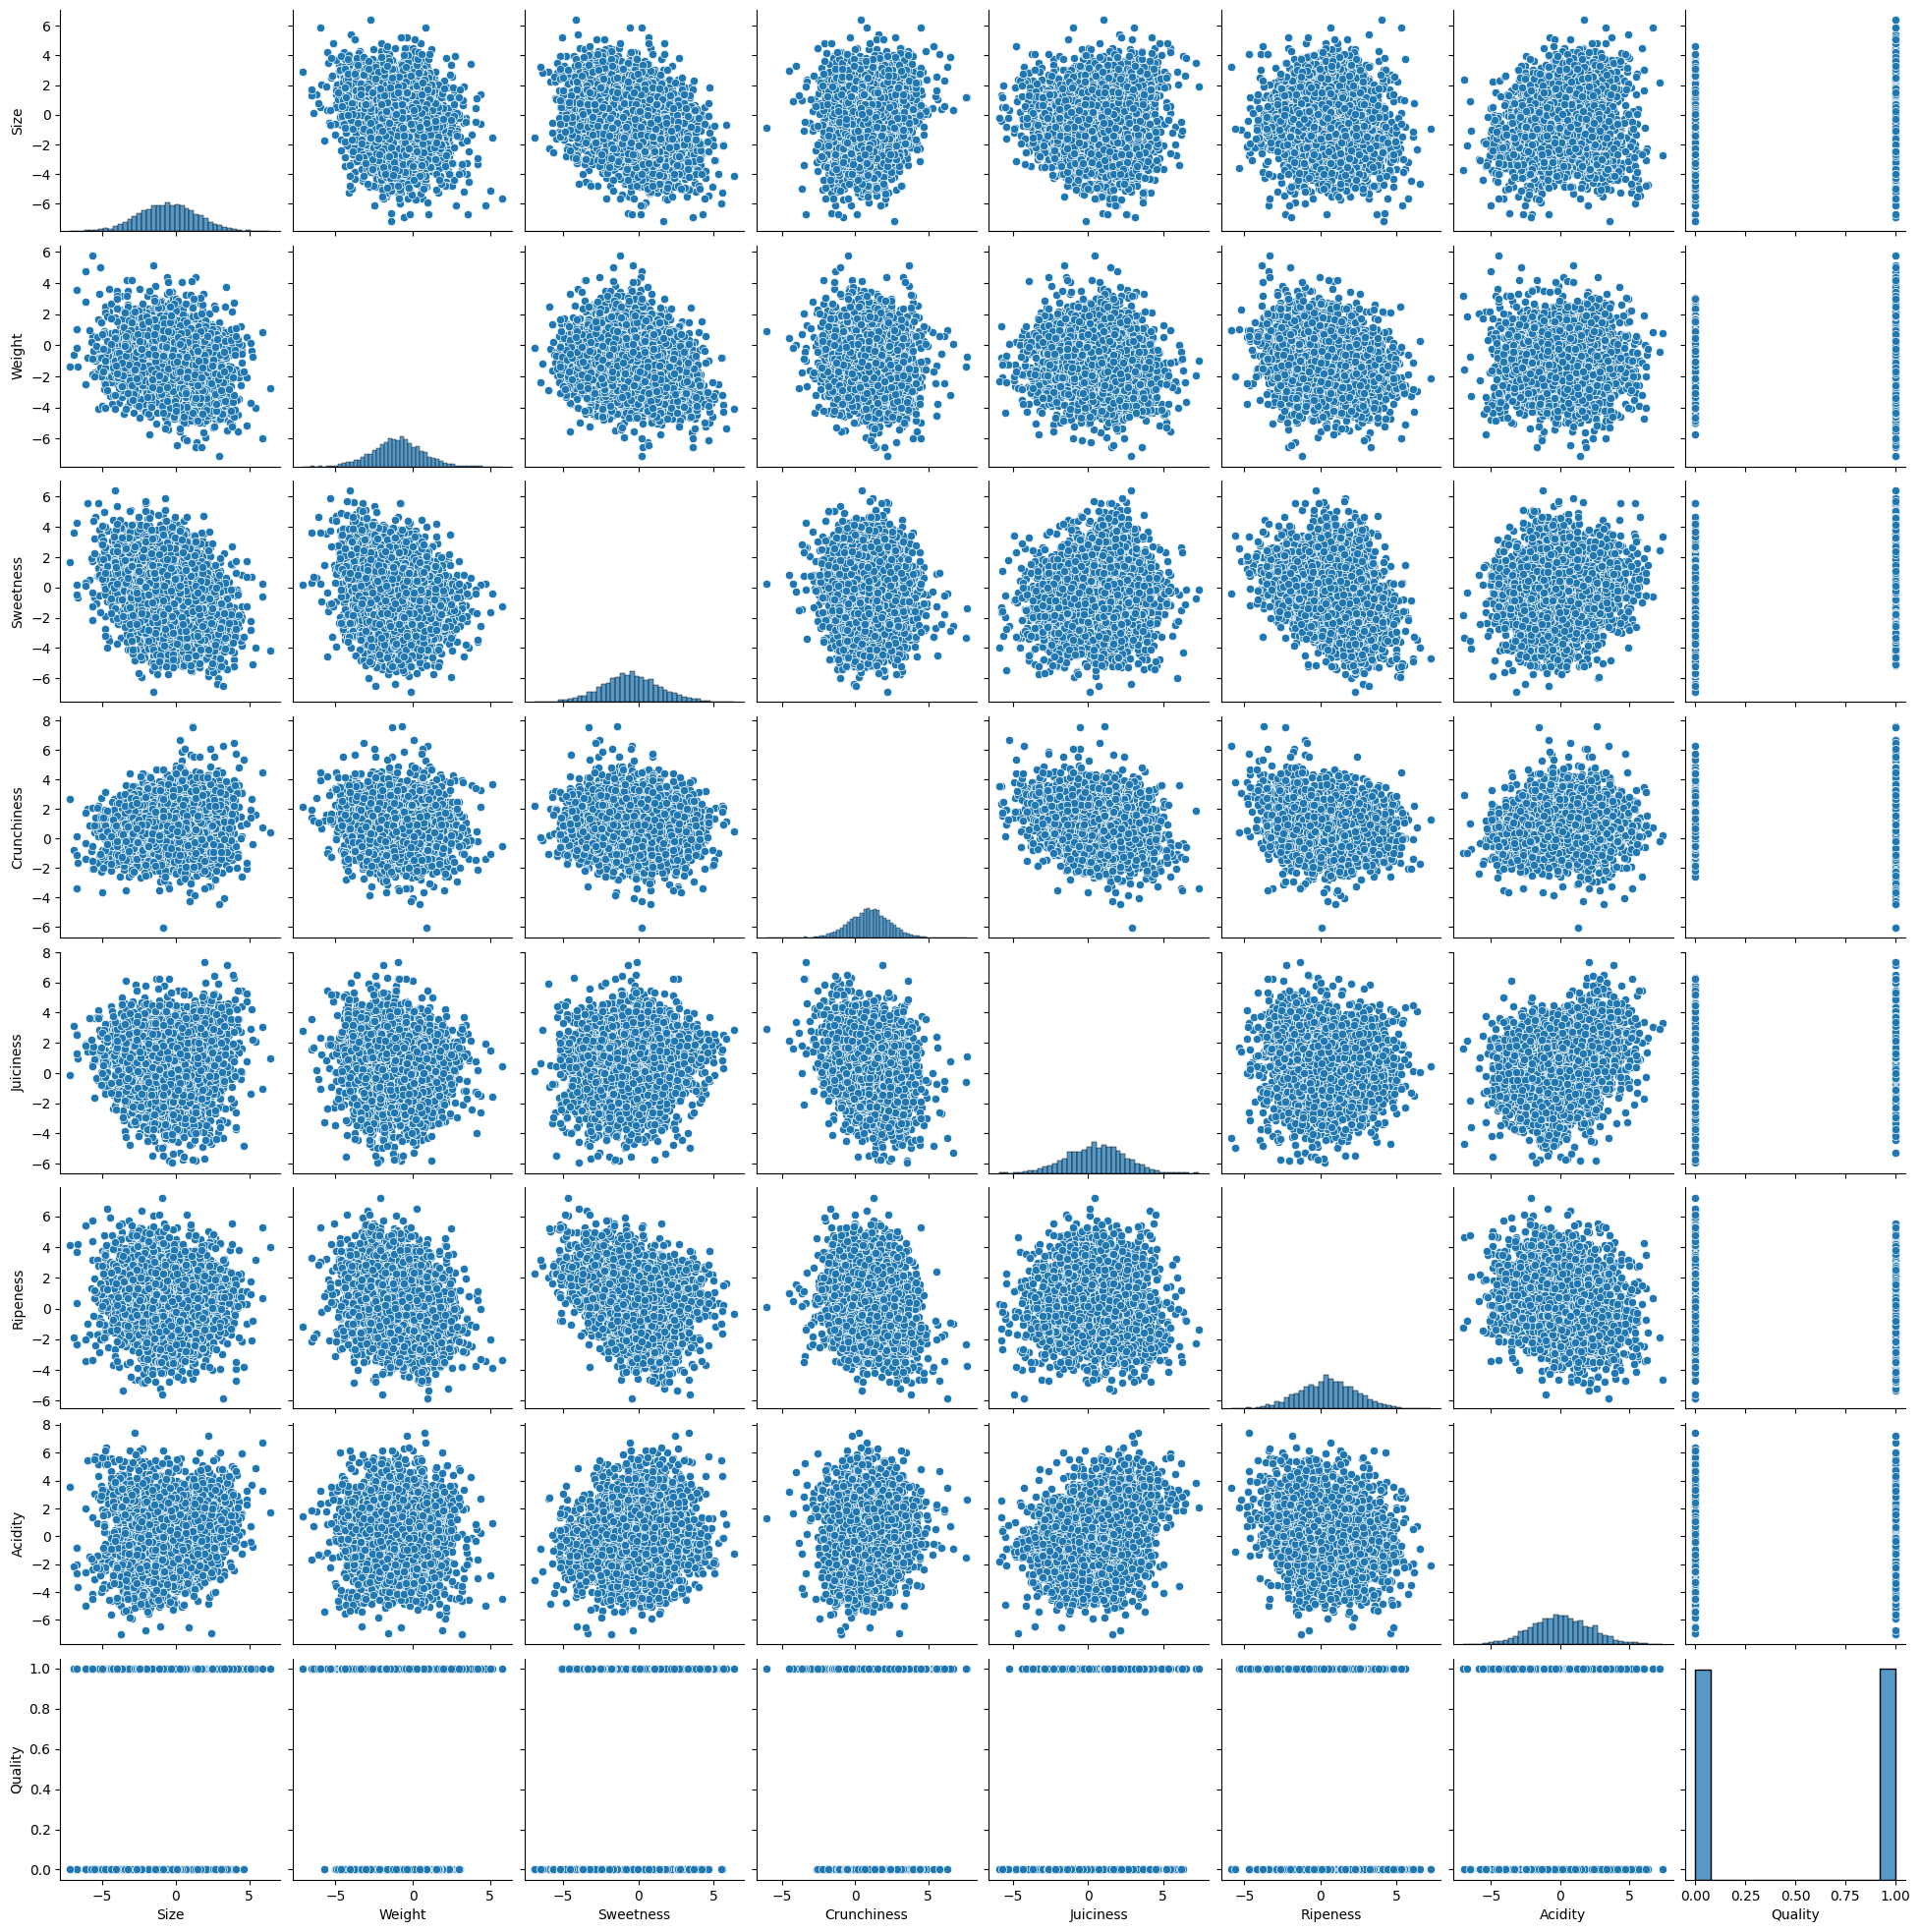

In [10]:
sns.pairplot(df_frutas, diag_kind='hist')

In [11]:
# Box-Plot Quality x Weight
px.box(df_frutas, x='Quality', y='Weight', color='Quality')

In [12]:
# Box-Plot Quality x Sweetness
px.box(df_frutas, x='Quality', y='Sweetness', color='Quality')

In [13]:
# Box-Plot Quality x Size
px.box(df_frutas, x='Quality', y='Size', color='Quality')

In [14]:
# Test T-Student

# Weight
grupo_good_weight = (df_frutas[df_frutas['Quality'] == 1])['Weight']
grupo_bad_weight = (df_frutas[df_frutas['Quality'] == 0])['Weight']
ttest(x=grupo_good_weight, y=grupo_bad_weight, paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.089906,3599.742464,two-sided,0.928367,"[-0.09, 0.1]",0.002841,0.036,0.050925


In [15]:
# Sweetness
grupo_good_Sweetness= (df_frutas[df_frutas['Quality'] == 1])['Sweetness']
grupo_bad_Sweetness= (df_frutas[df_frutas['Quality'] == 0])['Sweetness']
ttest(x=grupo_good_Sweetness, y=grupo_bad_Sweetness, paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,16.396437,3995.125489,two-sided,1.590329e-58,"[0.86, 1.09]",0.51847,7.576e+54,1.0


In [16]:
# Size
grupo_good_size = (df_frutas[df_frutas['Quality'] == 1])['Size']
grupo_bad_size = (df_frutas[df_frutas['Quality'] == 0])['Size']
ttest(x=grupo_good_size, y=grupo_bad_size, paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,15.912978,3951.450727,two-sided,2.602204e-55,"[0.82, 1.06]",0.5031,5.053e+51,NaN


## Corr Matrix

In [17]:
corr_matrix = df_frutas.corr()
corr_matrix

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218,0.244007
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414,0.001421
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999,0.250998
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943,-0.012376
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714,0.260223
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669,-0.264315
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000,-0.007697
Quality,0.244007,0.001421,0.250998,-0.012376,0.260223,-0.264315,-0.007697,1.000000


In [18]:
fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = corr_matrix.columns,
        y = corr_matrix.index,
        z = np.array(corr_matrix),
        text=corr_matrix.values,
        texttemplate='%{text:.2f}',
        colorscale=px.colors.diverging.RdBu,
        zmin = -1,
        zmax = 1
    )
)

fig.show()

### Treinamento do Modelo - Baseline

In [19]:
X = df_frutas.drop(columns=['Quality'], axis=1)
y = df_frutas['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [24]:
model_baseline = LogisticRegression(solver='liblinear')
model_baseline.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

### Métricas Baseline

In [34]:
y_pred = model_baseline.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 0], shape=(1200,))

In [38]:
# O quâo confiante o modelo está sobre aquela instância.
y_decision = model_baseline.decision_function(X_test)
y_decision

array([-0.62262518,  0.03737776,  0.24573024, ...,  0.2610187 ,
        0.4326487 , -2.21871192], shape=(1200,))

In [39]:
# Probavilidade da instância ser 1 ou 0.
y_prob = model_baseline.predict_proba(X_test)
y_prob

array([[0.65081537, 0.34918463],
       [0.49065665, 0.50934335],
       [0.43887471, 0.56112529],
       ...,
       [0.43511331, 0.56488669],
       [0.39349402, 0.60650598],
       [0.90191731, 0.09808269]], shape=(1200, 2))

In [44]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_decision)

In [45]:
roc_auc = auc(fpr, tpr)
roc_auc

0.8414568425263345

In [47]:
# Plot do gráfico
fig = px.area(
    x =fpr, y=tpr,
    title=f'Curva ROC (ROC={roc_auc:.4f})',
    labels=dict(x='FPR', y='TPR'),
    width=700, height=500
)

fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')

fig.show()

In [48]:
# Importância das Features
importance = np.abs(model_baseline.coef_)

# Exibir a importância de cada feature
for i, feature in enumerate(model_baseline.feature_names_in_):
    print(f'{feature}: {importance[0][i]}')

Size: 0.6049754259658939
Weight: 0.250178894526485
Sweetness: 0.5488782226573184
Crunchiness: 0.023646688656387905
Juiciness: 0.4354811581239467
Ripeness: 0.12462577365881079
Acidity: 0.2773317065762495


In [52]:
f1_score_baseline = f1_score(y_test, y_pred)
f1_score_baseline

0.7787903893951947

In [54]:
log_loss(y_test, y_pred)

8.019712879078565

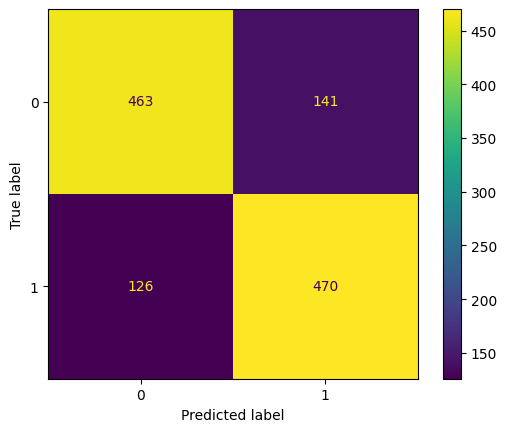

In [58]:
confusion_matrix_baseline = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix_baseline)
disp.plot()